**Ibale, Rolito Jr Mananquil BSCS 4-A**

**Practical Exam**

#Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)


2.14.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data Preprocessing

In [10]:
#I load my dataset from a CSV file into a DataFrame named 'data_s'
#https://drive.google.com/file/d/1-Co5kGMRALPxTrbj13hfx7F2nU7Ioz6G/view?usp=drive_link

file_id = '1-Co5kGMRALPxTrbj13hfx7F2nU7Ioz6G'
link = f'https://drive.google.com/uc?id={file_id}'
data_diab = pd.read_csv(link)
data_diab

#I display the first 7 rows of my DataFrame to get a glimpse of the data
data_diab.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [11]:
# Check for null values in dataset
data_diab.isnull().sum()
#As you can see we have missin value in the feild of ("Mortgage","Personal Loan", "Securities Account")

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

**Heatmap**

                          age  hypertension  heart_disease       bmi  \
age                  1.000000      0.251171       0.233354  0.337396   
hypertension         0.251171      1.000000       0.121262  0.147666   
heart_disease        0.233354      0.121262       1.000000  0.061198   
bmi                  0.337396      0.147666       0.061198  1.000000   
HbA1c_level          0.101354      0.080939       0.067589  0.082997   
blood_glucose_level  0.110672      0.084429       0.070066  0.091261   
diabetes             0.258008      0.197823       0.171727  0.214357   

                     HbA1c_level  blood_glucose_level  diabetes  
age                     0.101354             0.110672  0.258008  
hypertension            0.080939             0.084429  0.197823  
heart_disease           0.067589             0.070066  0.171727  
bmi                     0.082997             0.091261  0.214357  
HbA1c_level             1.000000             0.166733  0.400660  
blood_glucose_level     0.1

<ipython-input-13-ceeb9cfc7686>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_diab.corr()


<Axes: >

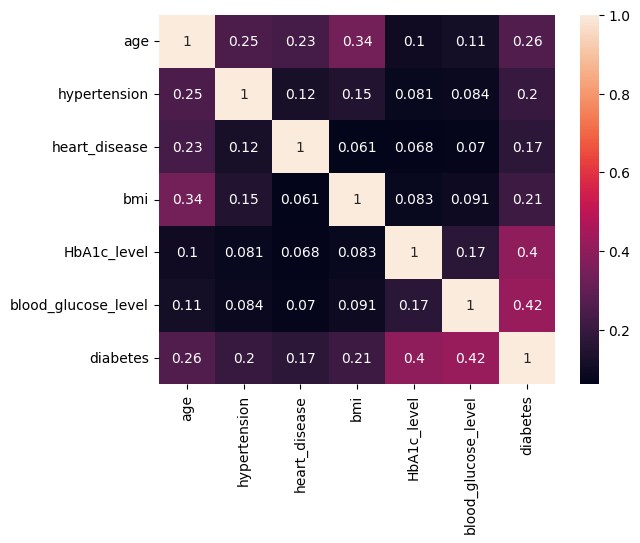

In [13]:
corr = data_diab.corr()
print(corr)
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns, annot = True)


**Splitting X and Y**

In [18]:
print(data_diab.columns)


Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [19]:
# Splitting the columns in to dependent variable (x) and independent variable (y).
x = data_diab.drop(["smoking_history", "gender", "diabetes"], axis = 1)
y = data_diab['diabetes']
x,y.head()

(        age  hypertension  heart_disease    bmi  HbA1c_level  \
 0      80.0             0              1  25.19          6.6   
 1      54.0             0              0  27.32          6.6   
 2      28.0             0              0  27.32          5.7   
 3      36.0             0              0  23.45          5.0   
 4      76.0             1              1  20.14          4.8   
 ...     ...           ...            ...    ...          ...   
 99995  80.0             0              0  27.32          6.2   
 99996   2.0             0              0  17.37          6.5   
 99997  66.0             0              0  27.83          5.7   
 99998  24.0             0              0  35.42          4.0   
 99999  57.0             0              0  22.43          6.6   
 
        blood_glucose_level  
 0                      140  
 1                       80  
 2                      158  
 3                      155  
 4                      155  
 ...                    ...  
 99995  

In [20]:
x

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,80.0,0,1,25.19,6.6,140
1,54.0,0,0,27.32,6.6,80
2,28.0,0,0,27.32,5.7,158
3,36.0,0,0,23.45,5.0,155
4,76.0,1,1,20.14,4.8,155
...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90
99996,2.0,0,0,17.37,6.5,100
99997,66.0,0,0,27.83,5.7,155
99998,24.0,0,0,35.42,4.0,100


In [21]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

**Separating the class 0 and class 1 Diabetes data**

In [22]:
z_class = data_diab[data_diab.diabetes==0]
z_class.shape

(91500, 9)

In [23]:
o_class = data_diab[data_diab.diabetes==1]
o_class.shape

(8500, 9)

#Implimentation of Logistic Regression and Feature Scaling

In [24]:
# Split data in to train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [25]:
# Scaling the data using Standard Scaler
scaler = StandardScaler()

# Fit the scaler to X_train and transform X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test using the same scaler
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[-1.77286554e+00, -2.83591372e-01, -2.02256450e-01,
        -1.63680432e+00,  6.28047693e-01,  5.17744967e-01],
       [ 5.80603115e-01, -2.83591372e-01, -2.02256450e-01,
        -4.13134567e-01,  4.41305544e-01, -1.95692520e-01],
       [-7.95954023e-01, -2.83591372e-01, -2.02256450e-01,
        -8.37059469e-01, -9.59260571e-01, -1.95692520e-01],
       ...,
       [ 1.06905887e+00, -2.83591372e-01, -2.02256450e-01,
         2.08832301e+00,  3.24243778e+00,  1.73326870e-01],
       [-2.18688126e-01, -2.83591372e-01, -2.02256450e-01,
         4.27198839e-01,  2.54563396e-01, -1.17974423e+00],
       [ 4.47387908e-01, -2.83591372e-01, -2.02256450e-01,
        -2.73918249e-03, -9.59260571e-01,  4.93143675e-01]])

In [26]:
X_test_scaled

array([[ 4.47387908e-01, -2.83591372e-01, -2.02256450e-01,
        -2.73918249e-03, -6.79147348e-01,  5.03204066e-02],
       [ 6.25008184e-01, -2.83591372e-01, -2.02256450e-01,
        -2.73918249e-03, -6.79147348e-01, -9.33731300e-01],
       [-8.84764160e-01, -2.83591372e-01, -2.02256450e-01,
         1.47648814e+00,  1.00153199e+00, -1.30275069e+00],
       ...,
       [ 1.69072984e+00, -2.83591372e-01,  4.94421810e+00,
         1.83667512e-01, -6.79147348e-01,  4.93143675e-01],
       [ 3.14172701e-01, -2.83591372e-01, -2.02256450e-01,
        -2.73918249e-03, -1.89297131e+00,  1.73326870e-01],
       [-1.68405540e+00, -2.83591372e-01, -2.02256450e-01,
        -1.65033384e+00,  1.61192321e-01,  4.19339797e-01]])

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [28]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [29]:
y_pred = model.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18297
           1       0.87      0.62      0.72      1703

    accuracy                           0.96     20000
   macro avg       0.92      0.81      0.85     20000
weighted avg       0.96      0.96      0.96     20000



<Axes: >

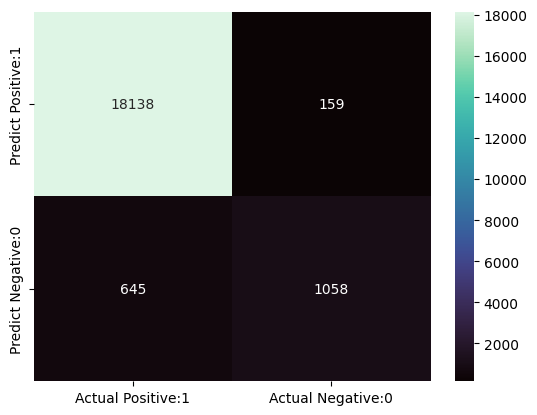

In [31]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

#Save the model

In [32]:
# save the model to disk
import pickle
pickle.dump(model, open('prac_model.pkl','wb'))